# Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling Perform following steps:
1.	Read the dataset.
2.	Distinguish the feature and target set and divide the data set into training and test sets.
3.	Normalize the train and test data.
4.	Initialize and build the model. Identify the points of improvement and implement the same.
5.	Print the accuracy score and confusion matrix.
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Importing the libraries

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Preprocessing. 

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1) #Dropping the unnecessary columns 

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Converting the Categorical Variables

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])


le1 = LabelEncoder()
df['Gender'] = le1.fit_transform(df['Gender'])

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## 2. Distinguish the feature and target set and divide the data set into training and test sets.

In [14]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

## 3. Normalize the train and test data.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
x_train  = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train.shape

(7000, 10)

## 4. Initialize and build the model. Identify the points of improvement and implement the same.

In [19]:
import keras 

2022-11-15 17:45:39.499765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 17:45:39.757794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 17:45:39.757822: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 17:45:39.791659: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 17:45:40.408599: W tensorflow/stream_executor/platform/de

In [20]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [21]:
model = Sequential()
model.add(Dense(16, input_shape=(x_train.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


2022-11-15 17:45:44.729131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 17:45:44.730237: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 17:45:44.730426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-15 17:45:44.730581: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-15 17:45:44.730718: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [22]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
# ignore comments in this cell

# compile the model

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.


#es = EarlyStopping(monitor='val_accuracy', mode='max',patience=10,restore_best_weights=True)


# now we just update our model fit call

history = model.fit(x_train,y_train,epochs=80,batch_size=10,validation_split=0.2,shuffle=True)

Epoch 1/80
560/560 [==============================] - 2s 2ms/step - loss: 0.5186 - accuracy: 0.7675 - val_loss: 0.4381 - val_accuracy: 0.8171
Epoch 2/80
560/560 [==============================] - 1s 2ms/step - loss: 0.4149 - accuracy: 0.8270 - val_loss: 0.4101 - val_accuracy: 0.8257
Epoch 3/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3864 - accuracy: 0.8427 - val_loss: 0.3917 - val_accuracy: 0.8371
Epoch 4/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3683 - accuracy: 0.8511 - val_loss: 0.3797 - val_accuracy: 0.8443
Epoch 5/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3579 - accuracy: 0.8545 - val_loss: 0.3721 - val_accuracy: 0.8421
Epoch 6/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8586 - val_loss: 0.3647 - val_accuracy: 0.8436
Epoch 7/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8630 - val_loss: 0.3592 - val_accuracy: 0.8450
Epoch 

560/560 [==============================] - 1s 2ms/step - loss: 0.3046 - accuracy: 0.8741 - val_loss: 0.3614 - val_accuracy: 0.8543
Epoch 59/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3054 - accuracy: 0.8725 - val_loss: 0.3596 - val_accuracy: 0.8471
Epoch 60/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3042 - accuracy: 0.8759 - val_loss: 0.3585 - val_accuracy: 0.8521
Epoch 61/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3028 - accuracy: 0.8732 - val_loss: 0.3663 - val_accuracy: 0.8536
Epoch 62/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3043 - accuracy: 0.8734 - val_loss: 0.3606 - val_accuracy: 0.8500
Epoch 63/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3042 - accuracy: 0.8741 - val_loss: 0.3614 - val_accuracy: 0.8536
Epoch 64/80
560/560 [==============================] - 1s 2ms/step - loss: 0.3037 - accuracy: 0.8739 - val_loss: 0.3605 - val_accuracy: 0.8471
Epoch 65/80

## 5. Print the accuracy score and confusion matrix

In [24]:
y_pred =model.predict(x_test)

94/94 [==============================] - 0s 1ms/step


In [25]:
y_pred = (y_pred > 0.5) #Predicting the result

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [27]:
cm = confusion_matrix(y_test,y_pred)

In [28]:
cm

array([[2276,  115],
       [ 341,  268]])

<AxesSubplot:>

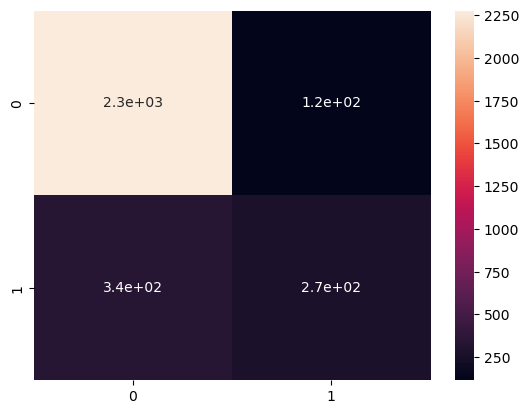

In [34]:
sns.heatmap(cm,annot=True)

In [30]:
accuracy = accuracy_score(y_test,y_pred)

In [31]:
accuracy

0.848

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2391
           1       0.70      0.44      0.54       609

    accuracy                           0.85      3000
   macro avg       0.78      0.70      0.72      3000
weighted avg       0.84      0.85      0.83      3000

